In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [2]:
neighborhood = gpd.read_file('../data/neighborhood.geojson')
print(neighborhood.crs)
neighborhood.head( )

EPSG:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."


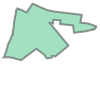

In [3]:
neighborhood.loc[1, 'geometry']

<Axes: >

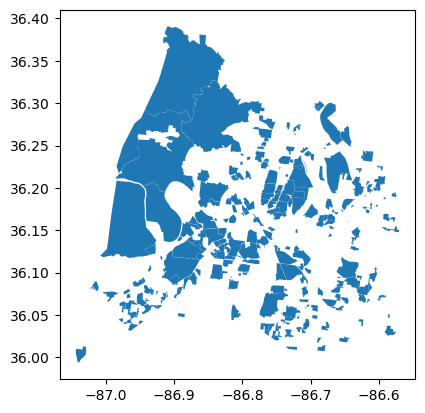

In [4]:
neighborhood.plot()

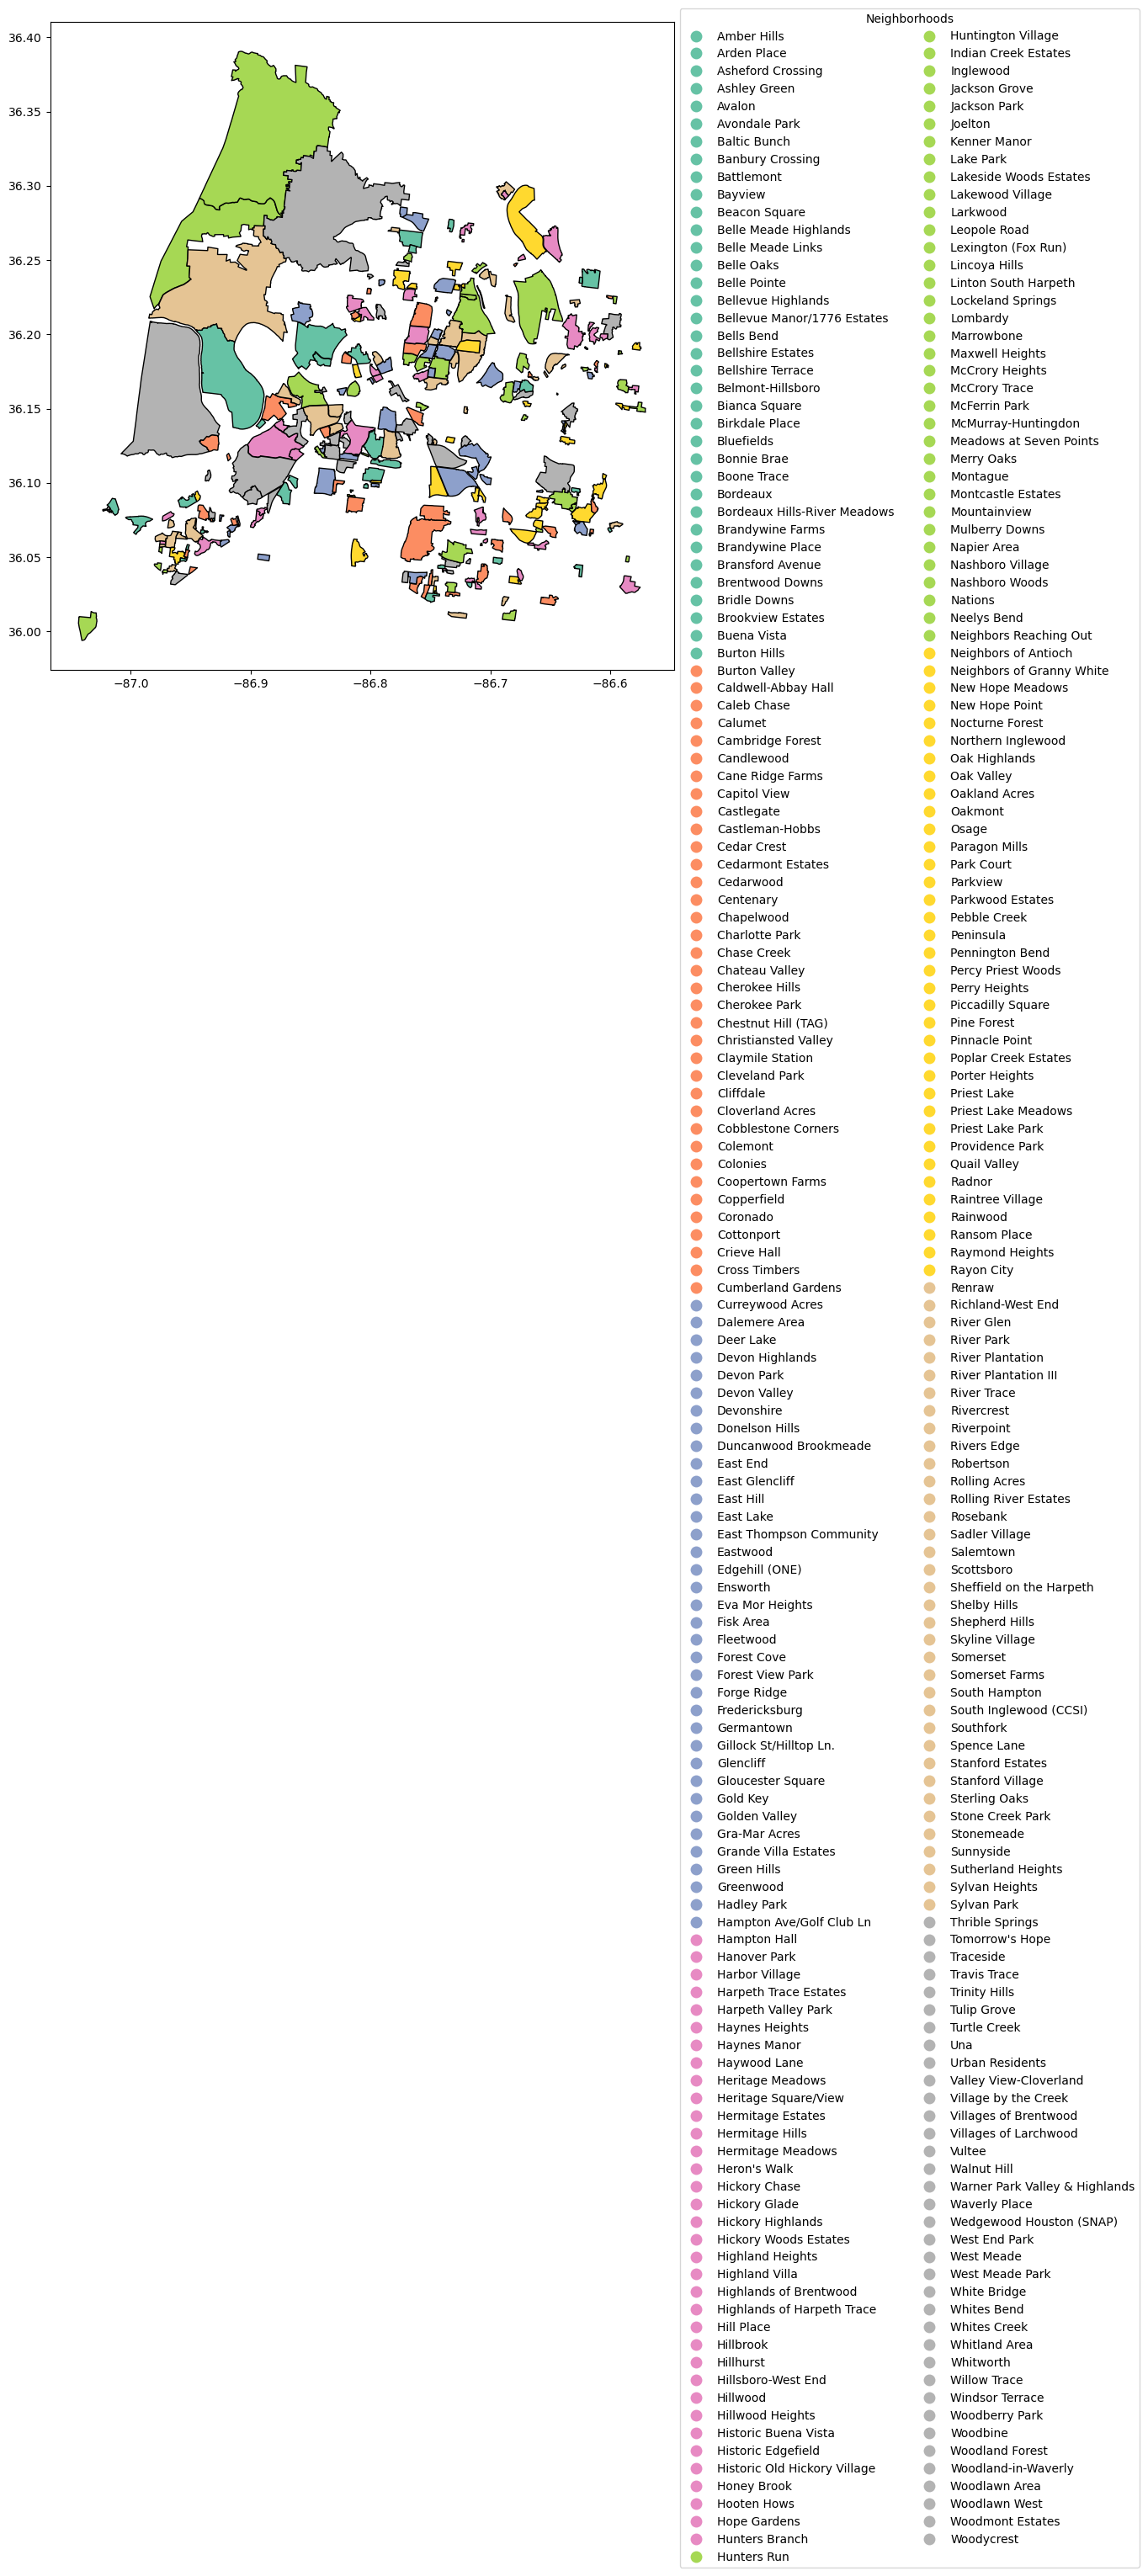

In [7]:
leg_kwds = {'title': 'Neighborhoods', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

neighborhood.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [10]:
historical = gpd.read_file('../data/historical markers.geojson')
print(historical.shape)
historical.head(3)

(255, 19)


,number,location,latitude,marker_name,@computed_region_3aw5_2wv7,marker_text,@computed_region_gisn_y5cm,@computed_region_sjpq_96s8,longitude,year_erected,@computed_region_f73m_vb2k,@computed_region_p6sk_2acq,@computed_region_v3ji_vzam,@computed_region_wvby_4s8j,@computed_region_gxvr_9jxz,@computed_region_cfa7_hbpz,@computed_region_c9xn_skx3,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,1,"Distinguished poet, critic, novelist, and teac...",1,30406,-86.781572,2005,7,20,2005,1,40,50,13,NaN,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,2,Percy Warner (1861-1927) was a pioneer in elec...,8,30816,-86.867129,1982,6,34,2005,1,32,NaN,34,NaN,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,1,"On August 18, 1920, Tennessee became the 36th ...",1,16169,-86.78287,1995,7,20,2005,1,1,NaN,13,NaN,POINT (-86.78287 36.16376)


In [12]:
neighborhood.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
hist_hoods = gpd.sjoin(historical, neighborhood, op = 'within')

C:\Users\jtbes\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
hist_hoods.head()

,number,location,latitude,marker_name,@computed_region_3aw5_2wv7,marker_text,@computed_region_gisn_y5cm,@computed_region_sjpq_96s8,longitude,year_erected,...,@computed_region_p6sk_2acq,@computed_region_v3ji_vzam,@computed_region_wvby_4s8j,@computed_region_gxvr_9jxz,@computed_region_cfa7_hbpz,@computed_region_c9xn_skx3,civil_war_site,geometry,index_right,name
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,1,"Distinguished poet, critic, novelist, and teac...",1,30406,-86.781572,2005,...,20,2005,1,40,50,13,NaN,POINT (-86.78157 36.15930),43,Urban Residents
15,12,"Hume-Fogg High School, 700 Broadway",36.159303,Nashville’s First Public School,1,"Nashville’s first public school, Hume School, ...",1,30406,-86.781572,1969,...,20,2005,1,40,50,13,NaN,POINT (-86.78157 36.15930),43,Urban Residents
26,184,715 Commerce Street,36.160541,The Jungle and Juanita's,1,"Warren Jett opened The Jungle, a restaurant an...",1,30406,-86.782123,2018,...,20,2005,1,40,50,13,NaN,POINT (-86.78212 36.16054),43,Urban Residents
32,3,NE corner of Second Avenue North and Banks Street,36.165123,Site of First Store,1,"Lardner Clark, “Merchant and Ordinary Keeper,”...",1,30396,-86.777237,1968,...,20,2005,1,29,50,13,NaN,POINT (-86.77724 36.16512),43,Urban Residents
67,44,"Third Avenue North, near intersection with Bro...",36.161898,Timothy Demonbreun,1,"Jacques-Timothe’ De Montbrun, born on Mar. 23,...",1,30396,-86.776215,1971,...,20,2005,1,29,50,13,NaN,POINT (-86.77621 36.16190),43,Urban Residents


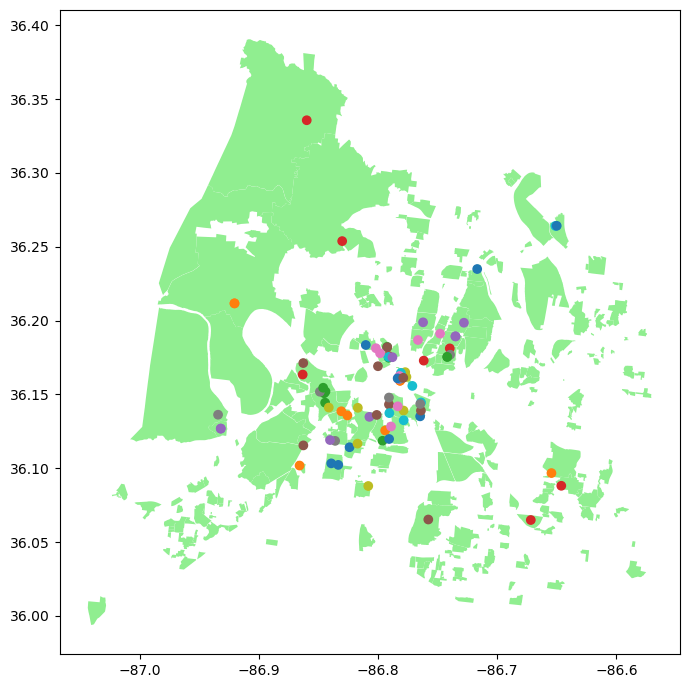

In [15]:
ax = neighborhood.plot(figsize = (8, 10), color = 'lightgreen')
hist_hoods.plot( ax = ax, column = 'number');
plt.show();

In [16]:
neighborhood.geometry.centroid

C:\Users\jtbes\AppData\Local\Temp\ipykernel_15336\1048287431.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhood.geometry.centroid


0      POINT (-86.79691 36.17507)
1      POINT (-86.87908 36.15089)
2      POINT (-86.88105 36.12587)
3      POINT (-86.74484 36.20023)
4      POINT (-86.76366 36.19051)
                  ...            
283    POINT (-86.94614 36.07160)
284    POINT (-86.71761 36.19197)
285    POINT (-86.99285 36.07372)
286    POINT (-87.01914 36.08190)
287    POINT (-86.67562 36.03446)
Length: 288, dtype: geometry

In [43]:
center = neighborhood.geometry.centroid[4]
area_center = [center.y, center.x]

C:\Users\jtbes\AppData\Local\Temp\ipykernel_15336\3363936311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = neighborhood.geometry.centroid[4]


In [44]:
map_hoods = folium.Map(location = area_center, zoom_start = 13)
map_hoods

In [88]:
import random 
from folium import plugins




map_hoods = folium.Map(location = area_center, zoom_start = 11, tiles = 'Stamen Terrain')
plugins.Fullscreen().add_to(map_hoods)



def get_random_color(feature):
     return {'fillColor': '#{0:06x}'.format(random.randint(0, 0xFFFFFF)),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5}


folium.GeoJson(neighborhood,style_function=get_random_color,tooltip=folium.GeoJsonTooltip(fields=['name']),).add_to(map_hoods)


for row_index, row_values in hist_hoods.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    icon=folium.Icon(color="lightred",icon="landmark", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_hoods)
map_hoods.save('../maps/map_hoods.html')


map_hoods

In [63]:
folium.Map?


In [82]:
cluster_map_hoods = folium.Map(location = area_center, zoom_start = 11)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_hoods)

folium.GeoJson(neighborhood).add_to(cluster_map_hoods)

# inside the loop add each marker to the cluster
for row_index, row_values in historical.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'] + ':' +'\n'+ row_values['marker_text'])
    icon=folium.Icon(color="lightred",icon="landmark", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_hoods.save('../maps/clusterhoods.html')

cluster_map_hoods

In [ ]:
#draw our zip code area: 37207
map_hoods = folium.Map(location =  area_center, zoom_start = 11)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207